# Data Augmentation project

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd 
import cv2 as cv

# 1. Image transformation methods
In this part, we propose a set of images transformations methods

In [2]:
# read an img into a ndarray
def get_img(file):
    img = Image.open(file)
    return np.asarray(img)

# show an ndarry as an img
def show_img(arr):
    plt.imshow(arr)
    plt.show()
# show hist
def hist(arr):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([arr],[i],None,[225],[0,225])
        plt.plot(histr,color = col)
        plt.xlim([0,225])
        plt.ylim([0,2000])
    plt.hist(arr.ravel(),225,[0,225]); 
    plt.show()

In [3]:
# random rotation
def random_rotate(arr):
    teta=np.random.uniform(0,2*np.pi)
    x,y,z=arr.shape
    matrice_rot=np.array([[np.cos(teta),-np.sin(teta)],[np.sin(teta),np.cos(teta)]],dtype='float')
    n_height= int(abs(x*np.cos(teta))+abs(y*np.sin(teta)))+1
    n_width = int(abs(y*np.cos(teta))+abs(x*np.sin(teta)))+1
    arr_bis=np.zeros((n_height,n_width, 3),dtype='uint8')
    org_c_height = int(((x+1)/2)-1)  
    org_c_width = int(((y+1)/2)-1)  
    n_c_height= int(((n_height+1)/2)-1) 
    n_c_width= int(((n_width+1)/2)-1) 
    for i in range(x):
        for j in range(y):
            vect=np.array([x-i-org_c_height,y-j-org_c_width])
            nv=np.dot(matrice_rot,vect)
            arr_bis[n_c_height-1-int(nv[0]),n_c_width-1-int(nv[1])]=arr[i,j]
    return arr_bis

# vertical flipping
def vertical_flip(arr):
    x, y, z = arr.shape
    arr_bis = arr.copy()
    for i in range(1, x):
        arr_bis[i] = arr[x - i]
    return arr_bis

# horizontal flipping
def horizontal_flip(arr):
    return np.flipud(arr)

# x-axis and y-axis translation
def translate(arr):
    shift_x=np.random.randint(100)
    shift_y=np.random.randint(100)
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            try:
                arr_bis[i,j] = arr[i+shift_x,j+shift_y]
            except:
                arr_bis[i,j] = [0, 0, 0]    
    return arr_bis

# croping
def crop(arr):
    top=np.random.randint(100)
    buttom=np.random.randint(100)
    right=np.random.randint(100)
    left=np.random.randint(100)
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            if (i in range(0+left, x-right)) and (j in range(0+buttom, y-top)):
                arr_bis[i,j] = arr[i,j]
            else:
                arr_bis[i,j] = [0, 0, 0]    
    return arr_bis

# color modification by eliminating a RGB color
def eliminate_color_rgb_blue(arr, col=0):
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            arr_bis[i,j,col] = 0
    return arr_bis
def eliminate_color_rgb_green(arr, col=1):
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            arr_bis[i,j,col] = 0
    return arr_bis
def eliminate_color_rgb_red(arr, col=2):
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            arr_bis[i,j,col] = 0
    return arr_bis

# adding illumination
def add_illumination(arr):
    num=np.random.randint(100)
    arr_bis = arr.copy()
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            for k in range(z):
                arr_bis[i,j,k] = min(arr_bis[i,j,k]+num, 255)
    return arr_bis

# adding normal noise

def add_noise(arr):
    std=np.random.randint(100)
    x = np.random.normal(0, std, arr.shape)
    arr_bis = arr + x
    max_arr=np.amax(arr_bis)
    min_arr=np.amin(arr_bis)
    a=255/(max_arr-min_arr)
    b=-a*min_arr
    arr_bis=a*arr_bis+b
    arr_bis = np.uint8(arr_bis)
    return arr_bis
#zoom 
def zoom_in(arr, fact=2):
    x,y=arr.shape[:2]
    arr_bis=arr.repeat(fact,axis=1).repeat(fact,axis=0)
    x_centre=arr_bis.shape[0]//2
    y_centre=arr_bis.shape[1]//2
    arr_bis=arr_bis[x_centre-x//2:x_centre+x//2,y_centre-y//2:y_centre+y//2]
    return arr_bis

# 2. Visualization
we propose to present some examples here : 
 - original image
 - rotated image (random angle)
 - translated image (random)
 - vertical flipping
 - horizontal flipping
 - crop (random)
 - eliminate_color_rgb(blue)
 - dd_illumination (random num )
 - image with normal noise (std = 50)

original


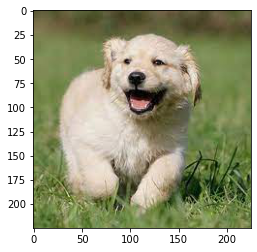

  0%|          | 0/11 [00:00<?, ?it/s]

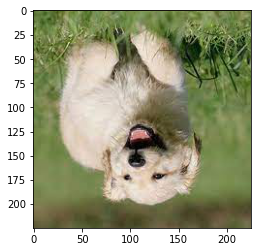

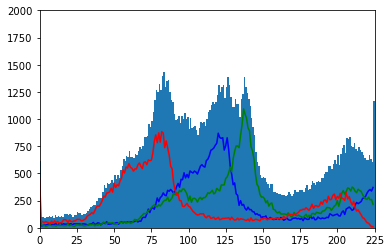

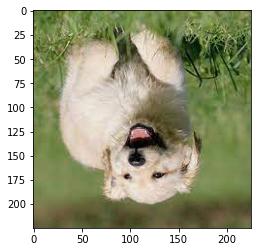

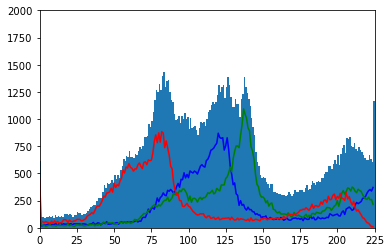

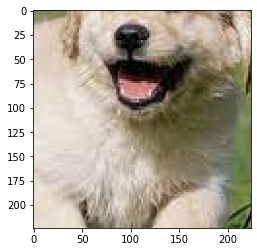

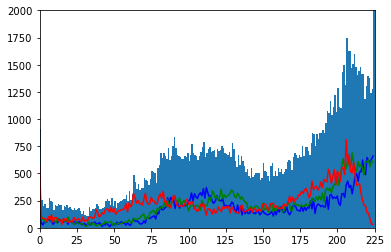

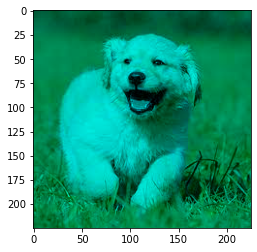

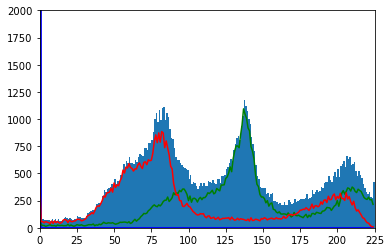

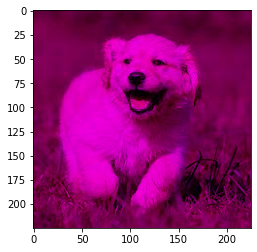

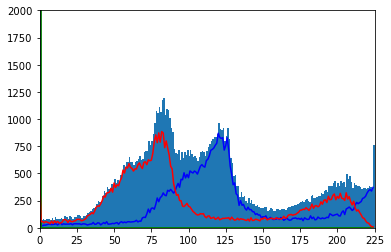

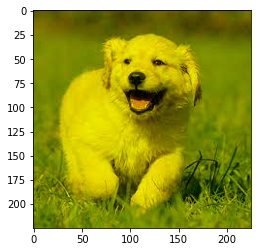

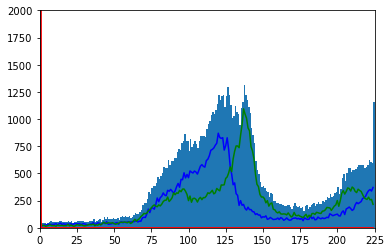

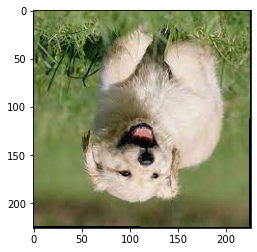

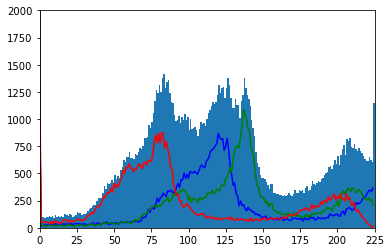

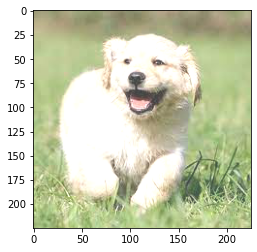

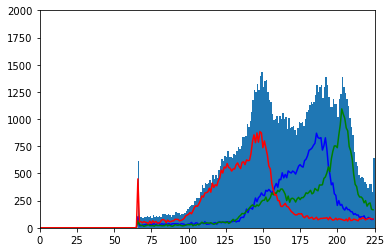

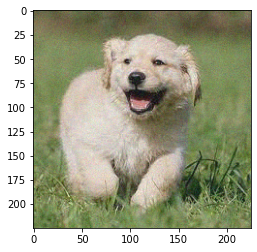

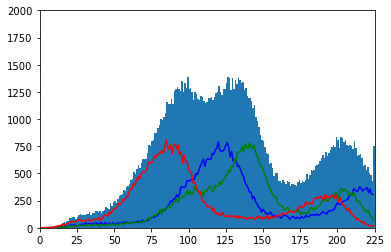

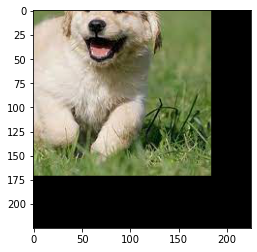

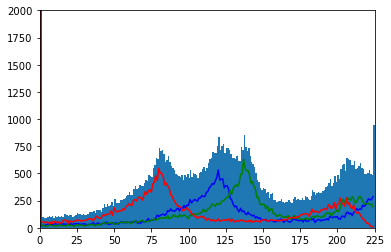

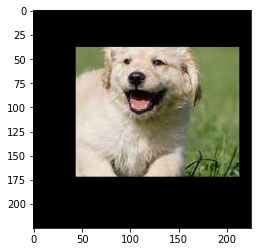

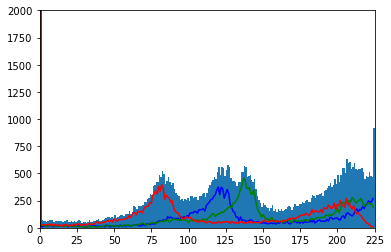

In [4]:
arr = get_img('img.jpg')
print("original")
show_img(arr)
methods=[vertical_flip, horizontal_flip,zoom_in,eliminate_color_rgb_blue,eliminate_color_rgb_green,eliminate_color_rgb_red,random_rotate, add_illumination, add_noise,translate,crop]

for method in tqdm(methods):
    arr_bis=method(arr)
    show_img(arr_bis)
    hist(arr_bis)
    

## Generating dataset

In [5]:
def generate_imgs(file, label):
    X = []
    arr = get_img(file)
    X.append(arr)
    methods_fixed=[vertical_flip, horizontal_flip,zoom_in,eliminate_color_rgb_blue,eliminate_color_rgb_green,eliminate_color_rgb_red]
    methods_rand = [random_rotate, add_illumination, add_noise,translate,crop]
    for i in tqdm(range(25)):
        method = np.random.choice(methods_rand)
        X.append(method(arr))
    for method_f in tqdm(methods_fixed):
        X.append(method_f(arr))
    y = [label]*len(X)
    return X, y

def generate_database():
    X = []
    y = []
    
    for file in ['dog_1.jpg', 'dog_2.jpg', 'dog_3.jpg','dog_4.jpg','dog_5.jpg','dog_6.jpg']:
        X_bis, y_bis = generate_imgs(file, 0)
        X.extend(X_bis)
        y.extend(y_bis)
    for file in ['tree_1.jpg', 'tree_2.jpg','tree_3.jpg','tree_4.jpg','tree_5.jpg']:
        X_bis, y_bis = generate_imgs(file, 1)
        X.extend(X_bis)
        y.extend(y_bis)
    
    return X, y

In [6]:
X, y = generate_database()

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
data = pd.DataFrame()
for i in tqdm(range(len(X))):
    x = X[i]
    h = np.histogram(x)
    c = list(np.append(h[0],h[1]))
    c.append(y[i])
    s = pd.Series(c, name=i)
    data = data.append(s, ignore_index=False)

  0%|          | 0/352 [00:00<?, ?it/s]

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,16874.0,33847.0,92127.0,140547.0,140981.0,116461.0,41161.0,62822.0,88770.0,16410.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,0.0
1,147.0,2838.0,28435.0,114561.0,235473.0,222967.0,114649.0,27451.0,3327.0,152.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,0.0
2,11960.0,12668.0,33600.0,60654.0,105377.0,85803.0,101379.0,104493.0,39932.0,194134.0,...,111.8,129.7,147.6,165.5,183.4,201.3,219.2,237.1,255.0,0.0
3,119527.0,28505.0,73845.0,113908.0,113763.0,94894.0,37692.0,62690.0,88766.0,16410.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,0.0
4,232622.0,25625.0,56424.0,89029.0,80159.0,65143.0,34360.0,61703.0,88534.0,16401.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,153200.0,91362.0,63736.0,43629.0,31085.0,22221.0,19765.0,15772.0,11557.0,776473.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,1.0
348,441956.0,238376.0,149504.0,91452.0,60740.0,41620.0,35616.0,26400.0,18976.0,124160.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,1.0
349,521067.0,57710.0,41026.0,29121.0,19839.0,13254.0,11419.0,9855.0,8005.0,517504.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,1.0
350,537147.0,58911.0,38148.0,24707.0,17530.0,12238.0,10649.0,7752.0,5677.0,516041.0,...,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0,1.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 351
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       352 non-null    float64
 1   1       352 non-null    float64
 2   2       352 non-null    float64
 3   3       352 non-null    float64
 4   4       352 non-null    float64
 5   5       352 non-null    float64
 6   6       352 non-null    float64
 7   7       352 non-null    float64
 8   8       352 non-null    float64
 9   9       352 non-null    float64
 10  10      352 non-null    float64
 11  11      352 non-null    float64
 12  12      352 non-null    float64
 13  13      352 non-null    float64
 14  14      352 non-null    float64
 15  15      352 non-null    float64
 16  16      352 non-null    float64
 17  17      352 non-null    float64
 18  18      352 non-null    float64
 19  19      352 non-null    float64
 20  20      352 non-null    float64
 21  21      352 non-null    float64
dtypes:

In [10]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(264, 21) (88, 21) (264,) (88,)


In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200)
clf = clf.fit(X_train,y_train)


C:\Users\nourl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print('train score: ', clf.score(X_train, y_train))
print('test score: ', clf.score(X_test, y_test))

train score:  0.7537878787878788
test score:  0.75


In [13]:
print(clf.coef_,clf.intercept_)

[[ 1.77406232e-06  4.55913499e-05 -5.16623970e-06 -2.53814928e-05
   6.57586729e-05 -5.49463887e-05  4.13261292e-05 -1.94963030e-05
   2.00145367e-05  4.18563025e-06 -3.78036191e-04 -7.86108618e-04
  -1.19418105e-03 -1.60225347e-03 -2.01032590e-03 -2.41839833e-03
  -2.82647075e-03 -3.23454318e-03 -3.64261561e-03 -4.05068803e-03
  -4.45876046e-03]] [-1.74793224e-05]


In [16]:
y_pred = clf.predict(X_test)
y_pred
X_test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
226,11568.0,28323.0,50909.0,67838.0,72091.0,70081.0,54184.0,47225.0,42125.0,305656.0,...,109.2,125.4,141.6,157.8,174.0,190.2,206.4,222.6,238.8,255.0
20,166692.0,30599.0,71547.0,109192.0,101615.0,82582.0,35922.0,56025.0,79556.0,16270.0,...,25.5,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0
162,59633.0,120458.0,95569.0,53465.0,28501.0,18629.0,14412.0,16622.0,79584.0,263127.0,...,67.8,88.6,109.4,130.2,151.0,171.8,192.6,213.4,234.2,255.0
333,518.0,13451.0,93689.0,163118.0,132527.0,216199.0,406564.0,183354.0,19048.0,332.0,...,25.5,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0
264,717784.0,48760.0,43174.0,47007.0,70979.0,75602.0,81592.0,98719.0,121791.0,1392.0,...,25.5,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,160151.0,1431.0,2179.0,4198.0,7664.0,10666.0,16548.0,18846.0,9456.0,57161.0,...,25.5,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0
100,1670.0,1556.0,2133.0,3634.0,6592.0,10528.0,13982.0,19936.0,18987.0,72857.0,...,44.4,67.8,91.2,114.6,138.0,161.4,184.8,208.2,231.6,255.0
148,107.0,2453.0,22729.0,75522.0,134266.0,200764.0,205555.0,95345.0,12709.0,550.0,...,25.4,50.8,76.2,101.6,127.0,152.4,177.8,203.2,228.6,254.0
144,226593.0,32136.0,48338.0,48418.0,50616.0,44574.0,47404.0,38421.0,28379.0,185121.0,...,25.5,51.0,76.5,102.0,127.5,153.0,178.5,204.0,229.5,255.0


In [17]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print("La matrice de confusion")
print(cm)

La matrice de confusion
[[41 14]
 [ 8 25]]
